In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('salary_class.csv')

In [4]:
df

,Unnamed: 0,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,0.0
1,1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,0.0
2,2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,1.0
3,3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,1.0
4,4,18,NaN,Some-college,10,Never-married,NaN,Own-child,White,Female,0.0,0.0,30.0,United-States,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40692,40692,48,Private,HS-grad,9,Divorced,Other-service,Not-in-family,Black,Female,0.0,0.0,20.0,United-States,0.0
40693,40693,60,Private,10th,6,Widowed,Sales,Not-in-family,White,Female,0.0,0.0,40.0,United-States,0.0
40694,40694,26,Private,HS-grad,9,Never-married,Transport-moving,Not-in-family,White,Male,0.0,0.0,40.0,United-States,0.0
40695,40695,20,Private,HS-grad,9,Never-married,Other-service,Other-relative,White,Male,0.0,0.0,40.0,United-States,0.0


- class 를 예측하는 ML 모델링을 만들기!
- class별에 따른 데이터의 분포가 궁금하다!
- 0과 1의 클래스 차이에 따른 다른 데이터의 분포나 기초통계량 등이 궁금할 수 있다/

- 결측치
- 데이터 타입에 대한 정보
- 최소한의 기초 통계
- 전체 데이터의 퀄리티 등을 확인해야 한다.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40697 entries, 0 to 40696
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      40697 non-null  int64  
 1   age             40697 non-null  int64  
 2   workclass       38368 non-null  object 
 3   education       40697 non-null  object 
 4   education-num   40697 non-null  int64  
 5   marital-status  40697 non-null  object 
 6   occupation      38359 non-null  object 
 7   relationship    40696 non-null  object 
 8   race            40696 non-null  object 
 9   sex             40696 non-null  object 
 10  capital-gain    40696 non-null  float64
 11  capital-loss    40696 non-null  float64
 12  hours-per-week  40696 non-null  float64
 13  native-country  39991 non-null  object 
 14  class           40696 non-null  float64
dtypes: float64(4), int64(3), object(8)
memory usage: 4.7+ MB


In [6]:
df.isna().sum()

Unnamed: 0           0
age                  0
workclass         2329
education            0
education-num        0
marital-status       0
occupation        2338
relationship         1
race                 1
sex                  1
capital-gain         1
capital-loss         1
hours-per-week       1
native-country     706
class                1
dtype: int64

In [7]:
# 결측치에 대한 확인
df['workclass'].value_counts()

#결측치는 채워야 한다.
#drop 채울 수 있다면 채우는 게 좋다.

#결측치를 대체하는 경우도
# 왜 결측치가 발생하는가? - 고민을 해야 한다.
# 이 결측치를 다른 값을 채워도 되는 건가?
# 데이터의 로직을 꼭 고민해야 한다.

Private             28173
Self-emp-not-inc     3257
Local-gov            2636
State-gov            1654
Self-emp-inc         1417
Federal-gov          1208
Without-pay            15
Never-worked            8
Name: workclass, dtype: int64

In [8]:
df.describe(include='all') #include='all'
#수치형 변수도 연속형, 순서형
# 두 개의 차이를 이해하고 접근
# 데이터에 대한 로직을 기반으로 꼭 접근해야 한다.


,Unnamed: 0,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
count,40697.000000,40697.000000,38368,40697,40697.000000,40697,38359,40696,40696,40696,40696.000000,40696.000000,40696.000000,39991,40696.000000
unique,NaN,NaN,8,16,NaN,8,14,6,5,2,NaN,NaN,NaN,41,NaN
top,NaN,NaN,Private,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,NaN
freq,NaN,NaN,28173,13205,NaN,18585,5142,16358,34831,27198,NaN,NaN,NaN,36557,NaN
mean,20348.000000,38.675406,NaN,NaN,10.079392,NaN,NaN,NaN,NaN,NaN,1082.424956,87.015063,40.400678,NaN,0.238279
std,11748.356289,13.756500,NaN,NaN,2.562462,NaN,NaN,NaN,NaN,NaN,7494.074082,401.960228,12.383334,NaN,0.426036
min,0.000000,17.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,0.000000
25%,10174.000000,28.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,0.000000
50%,20348.000000,37.000000,NaN,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,0.000000
75%,30522.000000,48.000000,NaN,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,0.000000


In [9]:
df.shape

(40697, 15)

### 원하는 데이터 타입에 따른 컬럼을 추출할 수 있다.

In [10]:
# int, float, object, timestamp  등등
# 해당 컬럼의 데이터타입만 추출할 수 있다.

int_list = []
for i in df.columns:
    if df[i].dtype =='int':
        int_list.append(i)

In [11]:
int_list

['Unnamed: 0', 'age', 'education-num']

In [12]:
df[int_list] # 수치형 변수만 뽑아서 전처리

,Unnamed: 0,age,education-num
0,0,25,7
1,1,38,9
2,2,28,12
3,3,44,10
4,4,18,10
...,...,...,...
40692,40692,48,9
40693,40693,60,6
40694,40694,26,9
40695,40695,20,9


In [13]:
df.columns

Index(['Unnamed: 0', 'age', 'workclass', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'class'],
      dtype='object')

In [14]:
# int, float, object, timestamp  등등
# 해당 컬럼의 데이터타입만 추출할 수 있다.

obj_list = []
for i in df.columns:
    if df[i].dtype =='object':
        obj_list.append(i)

In [15]:
df[obj_list]

,workclass,education,marital-status,occupation,relationship,race,sex,native-country
0,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,United-States
1,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,United-States
2,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,United-States
3,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,United-States
4,NaN,Some-college,Never-married,NaN,Own-child,White,Female,United-States
...,...,...,...,...,...,...,...,...
40692,Private,HS-grad,Divorced,Other-service,Not-in-family,Black,Female,United-States
40693,Private,10th,Widowed,Sales,Not-in-family,White,Female,United-States
40694,Private,HS-grad,Never-married,Transport-moving,Not-in-family,White,Male,United-States
40695,Private,HS-grad,Never-married,Other-service,Other-relative,White,Male,United-States


In [16]:
df_ob=df[obj_list]

### EDA  작업들

- unique한 값들
- 해당 변수에 대해서
- race

- 최대한 특성들을 고려해서 알려주는 게 가장 좋다.
- 과적합 또는 차원이 많아지면 흔히 말하는 차원의 저주가 발생할 수 있다. ( 컬럼이 너무 많아지는 경우 등 )

- 전처리 하는 과정에서 다른 변수들과 시각화를 통해 다양한 인사이트를 정리해야 한다.
- 흔히 말하는 시각화 및 전처리 하기 위해서는 결국 우리 목적은 0,1 분류하는 것
- 0과 1의 분류에 대한 인사이트를 기반으로 데이터에 대한 시각화 및 전처리를 진행 필수!

- 전처리를 하고 난 후에 평가 ( 모델링을 통한 평가지표로 확인 )
- 결과가 잘 나오지 않는다면 ? -> 개선을 해야 한다.
- 데이터를 더 넣거나, 모델링을 수정하거나, 튜닝하거나 등등 -> 가장 중요한 건 다시 전처리 작업을 진행하는 것

----
- 베이스라인 모델링을 하는 이유가
- 베이스라인의 성능을 보고 내가 전처리를 통해 개선하고 있다는 것을 확인해야 한다.

In [17]:
print(df_ob.race.value_counts())
print('----------------------------')
print(df_ob.sex.value_counts())
print('----------------------------')
print(df_ob.education.value_counts())

White                 34831
Black                  3881
Asian-Pac-Islander     1242
Amer-Indian-Eskimo      397
Other                   345
Name: race, dtype: int64
----------------------------
Male      27198
Female    13498
Name: sex, dtype: int64
----------------------------
HS-grad         13205
Some-college     9047
Bachelors        6716
Masters          2214
Assoc-voc        1721
11th             1523
Assoc-acdm       1314
10th             1162
7th-8th           790
Prof-school       677
9th               619
12th              537
Doctorate         489
5th-6th           420
1st-4th           197
Preschool          66
Name: education, dtype: int64


In [18]:
df_int= df[int_list]

In [19]:
# 연속형인지, 순서형인지 다 다르다.
df_int

,Unnamed: 0,age,education-num
0,0,25,7
1,1,38,9
2,2,28,12
3,3,44,10
4,4,18,10
...,...,...,...
40692,40692,48,9
40693,40693,60,6
40694,40694,26,9
40695,40695,20,9


In [20]:
np.sort(df_int['age'].unique())

array([17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90])

- 연령별 범주화도 만들 수 있다.
- 연봉관련된 데이터, 연봉관련되어서 연령별로 시니어, 주니어 등
- 수치형 데이터 전처리할 때 데이터데 한 로직을 필수적으로 알아야 한다.

In [21]:
np.sort(df_int['education-num'].unique())

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16])

In [22]:
print(df[df['education-num']==2].education.value_counts())

1st-4th    197
Name: education, dtype: int64


In [ ]:
#컬럼들과의 관계를 잘 정리를 꼭 해야 한다.

- 컬럼 정의서를 다시 만들어야 한다.
- 나만의 컬럼 정의서 ( 내가 데이터 분석할 때 나만의 컬럼 정의서를 다시 구체화 시켜야 한다.)
- 단순하게 분포만 보는 게 아니라 시각화도 -> 통계적으로 수치를 확인하고
- 데이터에 대한 전반적인 것들을 탐색하고 모델리을 준비하는 과정

In [23]:
for i in np.sort(df['education-num'].unique()):
    print(i, df[df['education-num']==i]['education'].unique())

1 ['Preschool']
2 ['1st-4th']
3 ['5th-6th']
4 ['7th-8th']
5 ['9th']
6 ['10th']
7 ['11th']
8 ['12th']
9 ['HS-grad']
10 ['Some-college']
11 ['Assoc-voc']
12 ['Assoc-acdm']
13 ['Bachelors']
14 ['Masters']
15 ['Prof-school']
16 ['Doctorate']


- 컬럼이 이미 인코딩 된 컬럼이네

<Axes: >

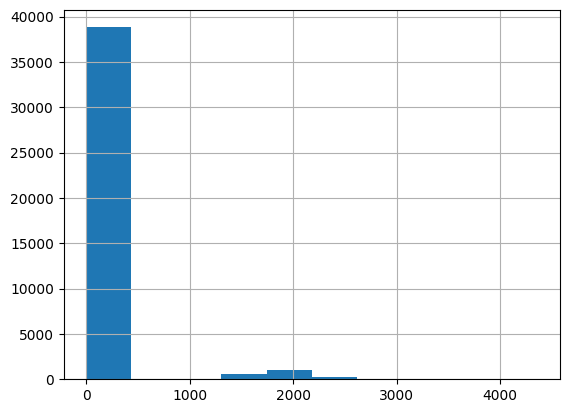

In [24]:
df['capital-loss'].hist()

<Axes: >

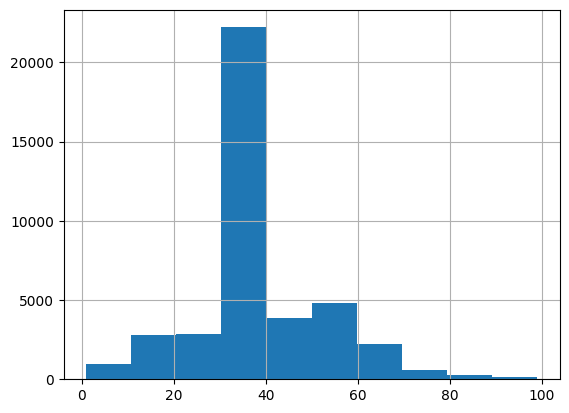

In [25]:
df['hours-per-week'].hist()

In [26]:
df_ob['native-country'].value_counts()
#미국은 1 나머지는 0이다. 이런 식으로 인코딩을 한다?
#국가별로 1,2,3,4,5,.... holand 인코딩한다?
#대륙별로도 진행

United-States                 36557
Mexico                          780
Philippines                     246
Germany                         168
Puerto-Rico                     165
Canada                          158
El-Salvador                     120
India                           116
Cuba                            115
England                         108
China                           106
South                            98
Dominican-Republic               86
Italy                            86
Jamaica                          81
Japan                            76
Poland                           76
Guatemala                        74
Haiti                            69
Vietnam                          69
Columbia                         68
Portugal                         58
Taiwan                           56
Iran                             51
Greece                           43
Nicaragua                        39
Ecuador                          36
Peru                        

In [27]:
df_nc=df[['native-country','class']]

In [28]:
#class에 대한 영향도를 확인해야 한다.
df_nc=df_nc.groupby('native-country').mean()
# 0과 1
# class 평균이 높으면 1에 대한 비중이 높다.

In [29]:
df_nc

,class
native-country,
Cambodia,0.240000
Canada,0.367089
China,0.283019
Columbia,0.058824
Cuba,0.208696
Dominican-Republic,0.058140
Ecuador,0.111111
El-Salvador,0.075000
England,0.398148


- 모델링을 진행해 보자!
- 과대적합, 과소적합, 오버피팅, 언더피팅의 개념
- 딥러닝-> 미니배치, 드랍아웃 과적합을 최대한 방지
- 머신러닝- > 교차검증,Train,test 등으로 나눠서 방지한다.
- 머신러닝의 모델링의 방식 -> 앙상블 부트스트래핑 방식으로 randomforest방식 으로 진행

In [30]:
df

,Unnamed: 0,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,0.0
1,1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,0.0
2,2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,1.0
3,3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,1.0
4,4,18,NaN,Some-college,10,Never-married,NaN,Own-child,White,Female,0.0,0.0,30.0,United-States,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40692,40692,48,Private,HS-grad,9,Divorced,Other-service,Not-in-family,Black,Female,0.0,0.0,20.0,United-States,0.0
40693,40693,60,Private,10th,6,Widowed,Sales,Not-in-family,White,Female,0.0,0.0,40.0,United-States,0.0
40694,40694,26,Private,HS-grad,9,Never-married,Transport-moving,Not-in-family,White,Male,0.0,0.0,40.0,United-States,0.0
40695,40695,20,Private,HS-grad,9,Never-married,Other-service,Other-relative,White,Male,0.0,0.0,40.0,United-States,0.0


In [31]:
df_nc = df_nc.reset_index()         # 인덱스 열 삭제

In [33]:
df_nc

,native-country,class
0,Cambodia,0.240000
1,Canada,0.367089
2,China,0.283019
3,Columbia,0.058824
4,Cuba,0.208696
5,Dominican-Republic,0.058140
6,Ecuador,0.111111
7,El-Salvador,0.075000
8,England,0.398148
9,France,0.433333


In [32]:
df=df.merge(df_nc, on='native-country', how='left')
df

,Unnamed: 0,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class_x,class_y
0,0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,0.0,0.242854
1,1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,0.0,0.242854
2,2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,1.0,0.242854
3,3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,1.0,0.242854
4,4,18,NaN,Some-college,10,Never-married,NaN,Own-child,White,Female,0.0,0.0,30.0,United-States,0.0,0.242854
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40692,40692,48,Private,HS-grad,9,Divorced,Other-service,Not-in-family,Black,Female,0.0,0.0,20.0,United-States,0.0,0.242854
40693,40693,60,Private,10th,6,Widowed,Sales,Not-in-family,White,Female,0.0,0.0,40.0,United-States,0.0,0.242854
40694,40694,26,Private,HS-grad,9,Never-married,Transport-moving,Not-in-family,White,Male,0.0,0.0,40.0,United-States,0.0,0.242854
40695,40695,20,Private,HS-grad,9,Never-married,Other-service,Other-relative,White,Male,0.0,0.0,40.0,United-States,0.0,0.242854


df와 df_nc를 native contry 기준으로 병합

In [34]:
#변수명만 수정하기
df.drop('native-country',axis=1, inplace=True)
df = df.rename(columns = {'class_x':'class', 'class_y':'nc_mean'})

In [35]:
df.isna().sum()

Unnamed: 0           0
age                  0
workclass         2329
education            0
education-num        0
marital-status       0
occupation        2338
relationship         1
race                 1
sex                  1
capital-gain         1
capital-loss         1
hours-per-week       1
class                1
nc_mean            706
dtype: int64

### 결측치를 다 날리는 것이 좋은 건 아니다.
- 학습할 수 있는 피처의 특징을 날리는 것 -> 살린다면 하나의 데이터로 남아서 분류하기 더 좋을 것
- 이것을 날리게 된다면 요리를 하는데 재료가 부족하게 되면 한정된 재료만 가지고 요리하게 되겠죠?

In [36]:
df['class'].value_counts()

0.0    30999
1.0     9697
Name: class, dtype: int64

- 클래스의 대한 균형도 중요하다.
- 클래스에 대한 분포도 꼭 확인해야 한다.

In [37]:
df.dropna(inplace=True)

In [38]:
df

,Unnamed: 0,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,class,nc_mean
0,0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,0.0,0.242854
1,1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,0.0,0.242854
2,2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,1.0,0.242854
3,3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,1.0,0.242854
5,5,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0.0,0.0,30.0,0.0,0.242854
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40691,40691,38,Private,HS-grad,9,Never-married,Other-service,Unmarried,Black,Female,0.0,0.0,24.0,0.0,0.242854
40692,40692,48,Private,HS-grad,9,Divorced,Other-service,Not-in-family,Black,Female,0.0,0.0,20.0,0.0,0.242854
40693,40693,60,Private,10th,6,Widowed,Sales,Not-in-family,White,Female,0.0,0.0,40.0,0.0,0.242854
40694,40694,26,Private,HS-grad,9,Never-married,Transport-moving,Not-in-family,White,Male,0.0,0.0,40.0,0.0,0.242854


- 모델링
- 0,1을 분류하는 이진분류의 트리계열 모델을 사용한다.
- 이상치에 덜 민감하다.
- 데이터가 얼마나 몰려 잇는지 데이터 속에서 정보를 얼마나 얻을 수 있는가-> 얼마나 데이터를 잘 분할할 수 있는가?

- 기본 base 모델로 평가하기!

In [39]:
#base 모델
df_base=df[['age','education-num','capital-gain','capital-loss','hours-per-week','nc_mean','class']]

In [ ]:
df_base

,age,education-num,capital-gain,capital-loss,hours-per-week,nc_mean,class
0,25,7,0,0,40,0.243977,0
1,38,9,0,0,50,0.243977,0
2,28,12,0,0,40,0.243977,1
3,44,10,7688,0,40,0.243977,1
5,34,6,0,0,30,0.243977,0
...,...,...,...,...,...,...,...
48837,27,12,0,0,38,0.243977,0
48838,40,9,0,0,40,0.243977,1
48839,58,9,0,0,40,0.243977,0
48840,22,9,0,0,20,0.243977,0


In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_base.drop('class',axis=1),
                                                   df_base['class'],test_size=0.3, random_state=111)

In [41]:
##의사결정나무를 이용해서 모델링 진행
##DT
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, y_train)
pred = model.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.8137601697912982

- 0.81 test 값으로 나옴
- trian 의 값은?

In [42]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, y_train)
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

print('Train_score : ',accuracy_score(y_train, train_pred))
print('Test_score :', accuracy_score(y_test, test_pred))

Train_score :  0.8907712715558083
Test_score : 0.813494870887867


- train > test 의 차이
- train < test 의 차이
- train == test 의 차이

- 과대적합, 과소적합의 인사이를 얻자!
### 결국 우리는 train의 정확도를 높여서 -> test도 높은 정확도가 나와야 한다!
- test가 정확도가 현실적으로 train보다는 낮을 수 밖에 없다.
- train test의 값을 최소화 하면서 최대한 둘다 높으면서 가장 높은 test의 정확도가 나와야 한다!

- 과대적합이다-> 너무 train 데이터에 대해서 몰두하여 과도하게 학습한 것
- 이것을 풀어야 한다.
- 하이퍼파라미터를 튜닝하는 등의 방법이나
- 규제라는 방법 들
- 과대적합을 줄이기 위해 노력
- train/test 외에 교차검증을 진행해서도 과대적합을 막는다.

In [43]:
##하이퍼파라미터 추가!

from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth= 5) #하이퍼 파라미터 추가
model.fit(X_train, y_train)
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

print('Train_score : ',accuracy_score(y_train, train_pred))
print('Test_score :', accuracy_score(y_test, test_pred))

Train_score :  0.8262649232518476
Test_score : 0.8286169083834454


In [44]:
##하이퍼파라미터 추가!

from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth= 7) #하이퍼 파라미터 추가
model.fit(X_train, y_train)
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

print('Train_score : ',accuracy_score(y_train, train_pred))
print('Test_score :', accuracy_score(y_test, test_pred))

Train_score :  0.8330869812393406
Test_score : 0.8292359391581181


### 정확도를 올릴 수 있는 방법은 무엇이 있나요?

In [45]:
df.columns

Index(['Unnamed: 0', 'age', 'workclass', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'class', 'nc_mean'],
      dtype='object')

In [46]:
df_add1=df[['age', 'workclass', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'class', 'nc_mean']]

### 정확도를 올리기 위해서는
- 데이터를 더 많이 학습시킵니다!
- 더 많은 데이터를 줍니다.
- 더 많은 데이터라는 것이 그냥 기존의 데이터에서 행을 추가하는 것이 아니라 피처의 특징을 잡아줄 컬럼을 추가한다.

In [47]:
df_add1=pd.get_dummies(df_add1, drop_first=True)

In [48]:
df_add1

,age,education-num,capital-gain,capital-loss,hours-per-week,class,nc_mean,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,...,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male
0,25,7,0.0,0.0,40.0,0.0,0.242854,0,1,0,...,0,0,1,0,0,0,1,0,0,1
1,38,9,0.0,0.0,50.0,0.0,0.242854,0,1,0,...,0,0,0,0,0,0,0,0,1,1
2,28,12,0.0,0.0,40.0,1.0,0.242854,1,0,0,...,0,0,0,0,0,0,0,0,1,1
3,44,10,7688.0,0.0,40.0,1.0,0.242854,0,1,0,...,0,0,0,0,0,0,1,0,0,1
5,34,6,0.0,0.0,30.0,0.0,0.242854,0,1,0,...,1,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40691,38,9,0.0,0.0,24.0,0.0,0.242854,0,1,0,...,0,0,0,1,0,0,1,0,0,0
40692,48,9,0.0,0.0,20.0,0.0,0.242854,0,1,0,...,1,0,0,0,0,0,1,0,0,0
40693,60,6,0.0,0.0,40.0,0.0,0.242854,0,1,0,...,1,0,0,0,0,0,0,0,1,0
40694,26,9,0.0,0.0,40.0,0.0,0.242854,0,1,0,...,1,0,0,0,0,0,0,0,1,1


In [49]:
df_add1= df_add1*1

In [50]:
df_add1

,age,education-num,capital-gain,capital-loss,hours-per-week,class,nc_mean,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,...,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male
0,25,7,0.0,0.0,40.0,0.0,0.242854,0,1,0,...,0,0,1,0,0,0,1,0,0,1
1,38,9,0.0,0.0,50.0,0.0,0.242854,0,1,0,...,0,0,0,0,0,0,0,0,1,1
2,28,12,0.0,0.0,40.0,1.0,0.242854,1,0,0,...,0,0,0,0,0,0,0,0,1,1
3,44,10,7688.0,0.0,40.0,1.0,0.242854,0,1,0,...,0,0,0,0,0,0,1,0,0,1
5,34,6,0.0,0.0,30.0,0.0,0.242854,0,1,0,...,1,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40691,38,9,0.0,0.0,24.0,0.0,0.242854,0,1,0,...,0,0,0,1,0,0,1,0,0,0
40692,48,9,0.0,0.0,20.0,0.0,0.242854,0,1,0,...,1,0,0,0,0,0,1,0,0,0
40693,60,6,0.0,0.0,40.0,0.0,0.242854,0,1,0,...,1,0,0,0,0,0,0,0,1,0
40694,26,9,0.0,0.0,40.0,0.0,0.242854,0,1,0,...,1,0,0,0,0,0,0,0,1,1


In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_add1.drop('class',axis=1),
                                                   df_add1['class'],test_size=0.3, random_state=111)

In [52]:
X_train

,age,education-num,capital-gain,capital-loss,hours-per-week,nc_mean,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male
29929,40,9,0.0,0.0,40.0,0.057971,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
17687,30,7,0.0,0.0,40.0,0.242854,0,1,0,0,...,0,0,1,0,0,0,0,0,1,1
34315,34,8,0.0,0.0,40.0,0.242854,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
30180,43,9,0.0,0.0,50.0,0.367089,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
28005,37,14,0.0,0.0,40.0,0.242854,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27311,27,9,0.0,0.0,30.0,0.242854,0,0,0,1,...,1,0,0,0,0,0,0,0,1,1
39903,40,13,0.0,0.0,40.0,0.242854,0,1,0,0,...,1,0,0,0,0,0,0,0,1,1
5223,64,15,99999.0,0.0,60.0,0.242854,0,0,1,0,...,0,0,0,0,0,0,0,0,1,1
11026,27,9,0.0,0.0,45.0,0.242854,0,1,0,0,...,0,1,0,0,0,0,0,0,1,1


In [53]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, y_train)
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

print('Train_score : ',accuracy_score(y_train, train_pred))
print('Test_score :', accuracy_score(y_test, test_pred))

Train_score :  0.9770324047754406
Test_score : 0.8144676335337814


### Base
- Train_score :  0.9749486652977413
- Test_score : 0.8146974275816319

In [54]:
##하이퍼파라미터 추가!

from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth= 5) #하이퍼 파라미터 추가
model.fit(X_train, y_train)
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

print('Train_score : ',accuracy_score(y_train, train_pred))
print('Test_score :', accuracy_score(y_test, test_pred))

Train_score :  0.8504832291074474
Test_score : 0.8450654403961797


In [55]:
##하이퍼파라미터 추가!

from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth= 7) #하이퍼 파라미터 추가
model.fit(X_train, y_train)
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

print('Train_score : ',accuracy_score(y_train, train_pred))
print('Test_score :', accuracy_score(y_test, test_pred))

Train_score :  0.856623081296191
Test_score : 0.8515210470463389


### 다양한 하이퍼파라미터들 중 최적의 하이퍼파라미터를 튜닝하는 법은?
- Search 하이퍼파라미터 최적화 방식
- 그리드서치, optuna, 랜덤서치, 베이지안최적화 등등 다 있다.

In [56]:
from sklearn.model_selection import GridSearchCV

In [57]:
params ={
    'max_depth':[6,7,8],
    'min_samples_split':[1,2,3,4,5],
    'min_samples_leaf':[4,5,6,7,8]
}

grid = GridSearchCV(model, param_grid = params, cv=3)
grid.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
45 fits failed out of a total of 225.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 889, in fit
    super().fit(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 177, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _valida

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(max_depth=7),
             param_grid={'max_depth': [6, 7, 8],
                         'min_samples_leaf': [4, 5, 6, 7, 8],
                         'min_samples_split': [1, 2, 3, 4, 5]})

In [58]:
grid.best_params_ #최적의 파라미터를 보여줘라!

{'max_depth': 8, 'min_samples_leaf': 4, 'min_samples_split': 4}

In [59]:
grid.best_estimator_

DecisionTreeClassifier(max_depth=8, min_samples_leaf=4, min_samples_split=4)

In [60]:
grid.best_score_

0.8529467500473754

In [61]:
grid_est = grid.best_estimator_
pred = grid_est.predict(X_test)
print(accuracy_score(y_test, pred))

0.8548814998231341


### 모델링을 하나 더 추가해 보자
- randomForestClassifier

In [62]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=111) #n_estimator 는 디폴트 100
clf.fit(X_train, y_train)

train_pred = clf.predict(X_train)
test_pred = clf.predict(X_test)

print('Train_score : ',accuracy_score(y_train, train_pred))
print('Test_score :', accuracy_score(y_test, test_pred))

Train_score :  0.9770324047754406
Test_score : 0.8466572338167669


- DT Base

- Train_score :  0.9749486652977413
- Test_score : 0.8146974275816319

- RF Base

- Train_score :  0.9749170747117359
- Test_score : 0.8472027714306773

In [63]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth= 7,random_state=111) #n_estimator 는 디폴트 100
clf.fit(X_train, y_train)

train_pred = clf.predict(X_train)
test_pred = clf.predict(X_test)

print('Train_score : ',accuracy_score(y_train, train_pred))
print('Test_score :', accuracy_score(y_test, test_pred))

Train_score :  0.8541216600341103
Test_score : 0.8497523876901308


- 하이퍼파라미터를 추가하면서 과적합을 막을 수 있다.

- 모델링을 통해서 수치를 더 좋게 만들기 위해 여러 방법들이 있지만
- 결국은 데이터가 가장 중요하다.
